In [1]:
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

import pandas as pd
from sklearn.datasets import load_svmlight_file

# 1. Basic: Deep learning process

In [3]:
#1. load data
data = load_svmlight_file("diabetes.txt")

X, y = data[0], data[1]
df = pd.DataFrame(X.toarray())
df['label'] = y

X = df.iloc[:, :8]
y = df['label']

print(df.head())

     0      1     2     3      4          5      6     7  label
0  6.0  148.0  72.0  35.0    0.0  33.599998  0.627  50.0   -1.0
1  1.0   85.0  66.0  29.0    0.0  26.600000  0.351  31.0    1.0
2  8.0  183.0  64.0   0.0    0.0  23.299999  0.672  32.0   -1.0
3  1.0   89.0  66.0  23.0   94.0  28.100000  0.167  21.0    1.0
4  0.0  137.0  40.0  35.0  168.0  43.099998  2.288  33.0   -1.0


In [4]:
#2. split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#3. select model
clf = Perceptron(max_iter=1000, eta0=0.1)

#4. train model 
clf.fit(X_train, y_train)

#5. get accuracy
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.4935064935064935


In [5]:
#clf = Perceptron(max_iter=1000, eta0=0.1,n_iter_no_change=10)

# 2. Advance: Improve accuracy

## 2-1. For data

### 2-1-1. Data scale

#### 2-1-1-1. Minmax

In [10]:
data = load_svmlight_file("diabetes_scale.txt")

X, y = data[0], data[1]
df = pd.DataFrame(X.toarray())
df['label'] = y

X = df.iloc[:, :8]
y = df['label']

print(df.head())

          0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929 -1.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141 -1.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180 -1.000000 -1.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4 -1.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  label  
0 -0.033333   -1.0  
1 -0.666667    1.0  
2 -0.633333   -1.0  
3 -1.000000    1.0  
4 -0.600000   -1.0  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.6536796536796536


#### 2-1-1-2. Robust

In [13]:
from sklearn.preprocessing import RobustScaler

data = load_svmlight_file("diabetes.txt")

X, y = data[0], data[1]
df = pd.DataFrame(X.toarray())
df['label'] = y

df.columns = df.columns.astype(str)

# init Robust Scaler
scaler = RobustScaler()

# run Robust Scaling
data_robust_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(data_robust_scaled)

       0         1         2        3         4         5         6         7  \
0    0.6  0.751515  0.000000  0.37500 -0.239686  0.172043  0.665359  1.235294   
1   -0.4 -0.775758 -0.333333  0.18750 -0.239686 -0.580645 -0.056209  0.117647   
2    1.0  1.600000 -0.444444 -0.71875 -0.239686 -0.935484  0.783007  0.176471   
3   -0.4 -0.678788 -0.333333  0.00000  0.499018 -0.419355 -0.537255 -0.470588   
4   -0.6  0.484848 -1.777778  0.37500  1.080550  1.193548  5.007843  0.235294   
..   ...       ...       ...      ...       ...       ...       ...       ...   
763  1.4 -0.387879  0.222222  0.78125  1.174853  0.096774 -0.526797  2.000000   
764 -0.2  0.121212 -0.111111  0.12500 -0.239686  0.516129 -0.084967 -0.117647   
765  0.4  0.096970  0.000000  0.00000  0.640472 -0.623656 -0.333333  0.058824   
766 -0.4  0.218182 -0.666667 -0.71875 -0.239686 -0.204301 -0.061438  1.058824   
767 -0.4 -0.581818 -0.111111  0.25000 -0.239686 -0.172043 -0.150327 -0.352941   

     label  
0     -1.0  
1

In [14]:
X = data_robust_scaled.iloc[:, :8]
y = data_robust_scaled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.7056277056277056


### 2-1-2. Data clean

<Axes: >

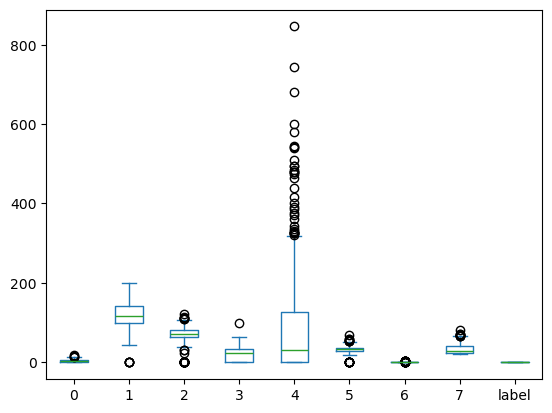

In [16]:
data = load_svmlight_file("diabetes.txt")

X, y = data[0], data[1]
df = pd.DataFrame(X.toarray())
df['label'] = y

#1. check data by plot
df.plot.box()

#### 1. 

<Axes: >

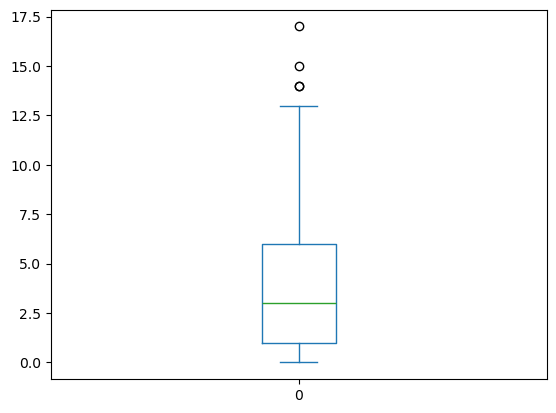

In [18]:
df[0].plot.box()

In [19]:
Q1 = df[0].quantile(0.25)  
Q3 = df[0].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

threshold = upper_bound
count = (df[0] > threshold).sum()
print(count)

13.5
4


In [20]:
df.drop(df[df[0] > threshold].index, inplace=True)
print(df.shape)

(764, 9)


#### 2. 

<Axes: >

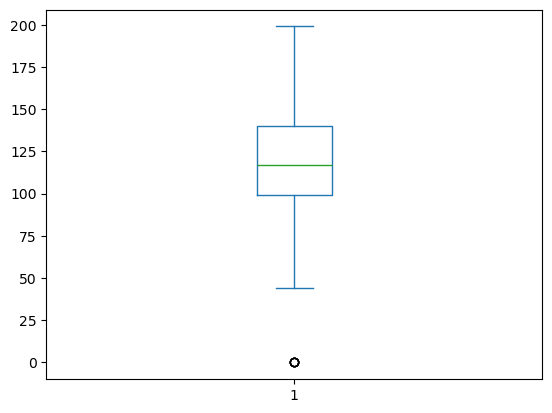

In [22]:
df[1].plot.box()

In [23]:
Q1 = df[1].quantile(0.25)  
Q3 = df[1].quantile(0.75)  
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)

threshold = lower_bound
count = (df[1]< threshold).sum()
print(count)

37.5
5


In [24]:
df.drop(df[df[1] < threshold].index, inplace=True)
print(df.shape)

(759, 9)


#### 3. 

<Axes: >

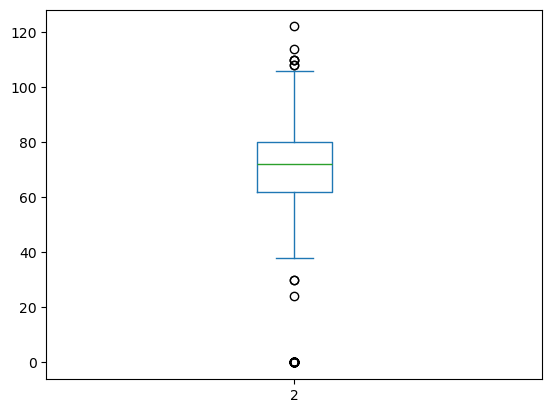

In [26]:
df[2].plot.box()

In [27]:
Q1 = df[2].quantile(0.25)  
Q3 = df[2].quantile(0.75) 
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)

threshold = upper_bound
count = (df[2]> threshold ).sum()
print(count)

threshold = lower_bound
count = (df[2]< threshold ).sum()
print(count)

107.0
35.0
7
38


In [28]:
threshold = upper_bound
for value in df[2]:
    if value>threshold:
        print(value)

110.0
108.0
122.0
110.0
108.0
110.0
114.0


In [29]:
df.drop(df[df[2] ==122].index, inplace=True)
print(df.shape)

(758, 9)


#### 4. 

<Axes: >

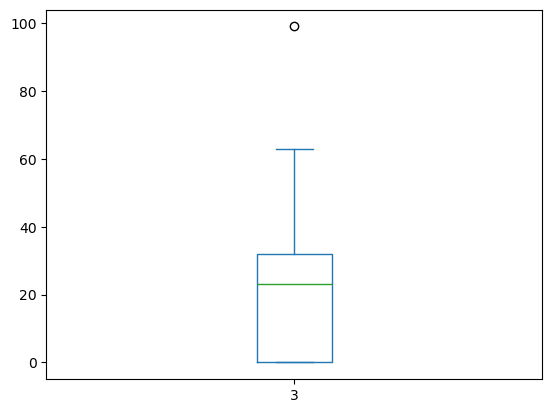

In [31]:
df[3].plot.box()

In [32]:
Q1 = df[3].quantile(0.25) 
Q3 = df[3].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

threshold = upper_bound
count = (df[3]> threshold ).sum()
print(count)

80.0
1


In [33]:
df.drop(df[df[3] > threshold].index, inplace=True)
print(df.shape)

(757, 9)


#### 5. 

<Axes: >

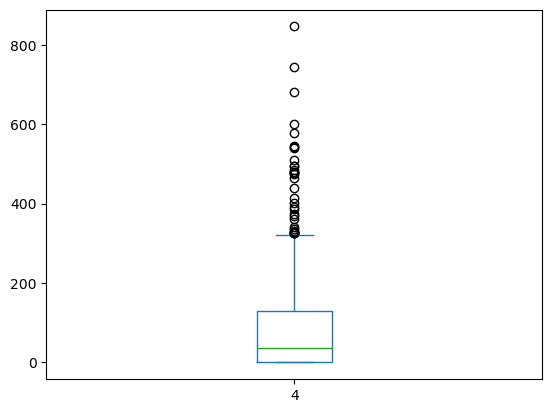

In [35]:
df[4].plot.box()

In [36]:
top_three_a = df[4].nlargest(5)

print(top_three_a)

13     846.0
228    744.0
247    680.0
584    600.0
409    579.0
Name: 4, dtype: float64


In [37]:
threshold = 600
df.drop(df[df[4] > threshold].index, inplace=True)
print(df.shape)

(754, 9)


#### 6. 

<Axes: >

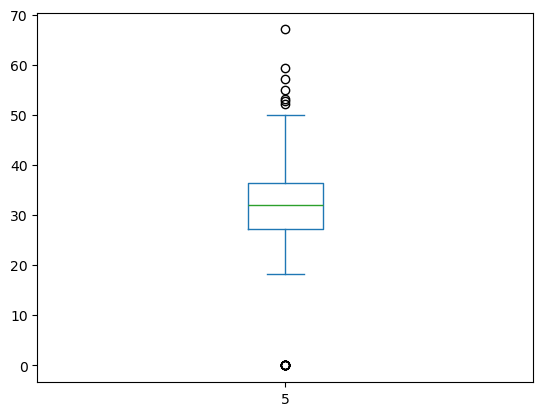

In [39]:
df[5].plot.box()

In [40]:
Q1 = df[5].quantile(0.25)
Q3 = df[5].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)

threshold = upper_bound
count = (df[5]> threshold ).sum()
print(count)

threshold = lower_bound
count = (df[5]< threshold ).sum()
print(count)

50.3000015
13.4999975
7
11


In [41]:
top_three_a = df[5].nlargest(5)

print(top_three_a)

177    67.099998
445    59.400002
673    57.299999
125    55.000000
120    53.200001
Name: 5, dtype: float64


In [42]:
df.drop(df[df[5] > 60].index, inplace=True)
print(df.shape)

(753, 9)


#### 7. 

<Axes: >

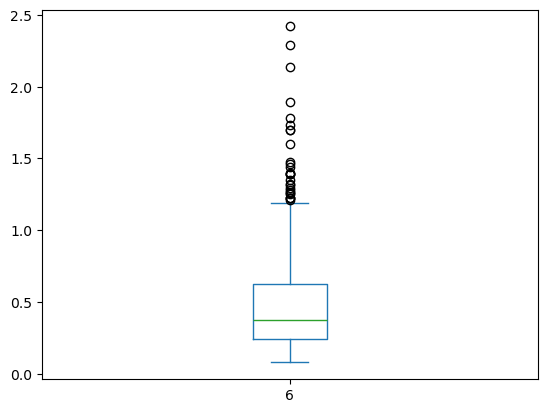

In [44]:
df[6].plot.box()

In [45]:
top_three_a = df[6].nlargest(20)

print(top_three_a)

445    2.420
4      2.288
370    2.137
45     1.893
58     1.781
371    1.731
593    1.699
621    1.698
395    1.600
330    1.476
622    1.461
12     1.441
147    1.400
661    1.394
308    1.391
39     1.390
259    1.353
187    1.321
243    1.318
659    1.292
Name: 6, dtype: float64


In [46]:
threshold = 1.9
count = (df[6]> threshold ).sum()
print(count)

df.drop(df[df[6] > 1.9].index, inplace=True)
print(df.shape)

3
(750, 9)


#### 8. 

<Axes: >

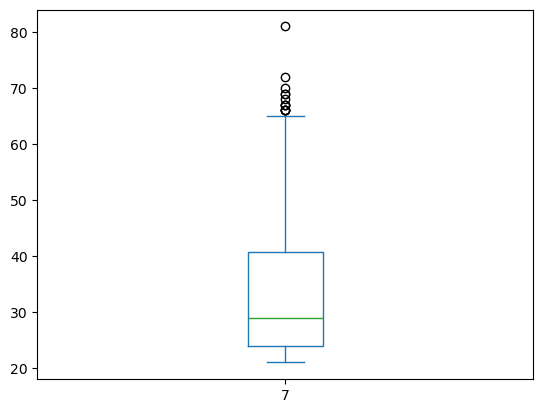

In [48]:
df[7].plot.box()

In [49]:
Q1 = df[7].quantile(0.25) 
Q3 = df[7].quantile(0.75) 
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

threshold = upper_bound
count = (df[7]> threshold ).sum()
print(count)

65.875
13


In [50]:
top_three_a = df[7].nlargest(13)

print(top_three_a)

459    81.0
453    72.0
666    70.0
123    69.0
684    69.0
674    68.0
363    67.0
489    67.0
537    67.0
221    66.0
495    66.0
552    66.0
759    66.0
Name: 7, dtype: float64


In [51]:
df.drop(df[df[7] > 72].index, inplace=True)
print(df.shape)

(749, 9)


#### Scale data and test

In [53]:
df.columns = df.columns.astype(str)

scaler = RobustScaler()
data_robust_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(data_robust_scaled)

       0         1         2        3         4         5         6       7  \
0    0.6  0.756098  0.000000  0.37500 -0.230159  0.175824  0.674541  1.3125   
1   -0.4 -0.780488 -0.333333  0.18750 -0.230159 -0.593406 -0.049869  0.1250   
2    1.0  1.609756 -0.444444 -0.71875 -0.230159 -0.956044  0.792651  0.1875   
3   -0.4 -0.682927 -0.333333  0.00000  0.515873 -0.428571 -0.532808 -0.5000   
4    0.4 -0.024390  0.111111 -0.71875 -0.230159 -0.703296 -0.443570  0.0625   
..   ...       ...       ...      ...       ...       ...       ...     ...   
744  1.4 -0.390244  0.222222  0.78125  1.198413  0.098901 -0.522310  2.1250   
745 -0.2  0.121951 -0.111111  0.12500 -0.230159  0.527472 -0.078740 -0.1250   
746  0.4  0.097561  0.000000  0.00000  0.658730 -0.637362 -0.328084  0.0625   
747 -0.4  0.219512 -0.666667 -0.71875 -0.230159 -0.208791 -0.055118  1.1250   
748 -0.4 -0.585366 -0.111111  0.25000 -0.230159 -0.175824 -0.144357 -0.3750   

     label  
0     -1.0  
1      0.0  
2     -1.0  

In [54]:
X = data_robust_scaled.iloc[:, :8]
y = data_robust_scaled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


### 2-1-3. Data feature

#### 2-1-3-1. 7 feature

In [57]:
#find the 6 features most important
from sklearn.feature_selection import RFE

model = Perceptron(max_iter=1000, eta0=0.1)

rfe = RFE(estimator=model, n_features_to_select=7) 
rfe = rfe.fit(X, y)

print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True  True  True  True  True  True  True False]
Feature ranking: [1 1 1 1 1 1 1 2]


In [58]:
X_7 = X.drop(columns=['7'])
print(X_7.shape)

(749, 7)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_7, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.5511111111111111


#### 2-1-3-2. 6 feature

In [61]:
#find the 6 features most important
from sklearn.feature_selection import RFE

model = Perceptron(max_iter=1000, eta0=0.1)

rfe = RFE(estimator=model, n_features_to_select=6) 
rfe = rfe.fit(X, y)

print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True  True  True False  True  True  True False]
Feature ranking: [1 1 1 2 1 1 1 3]


In [62]:
X_6 = X.drop(columns=['3', '7'])
print(X_6.shape)

(749, 6)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.7555555555555555


#### 2-1-3-3. 5 feature

In [65]:
#find the 6 features most important
from sklearn.feature_selection import RFE

model = Perceptron(max_iter=1000, eta0=0.1)

rfe = RFE(estimator=model, n_features_to_select=5) 
rfe = rfe.fit(X, y)

print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [ True  True False False  True  True  True False]
Feature ranking: [1 1 2 3 1 1 1 4]


In [66]:
X_5 = X.drop(columns=['2','3', '7'])
print(X_5.shape)

(749, 5)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.72


#### 2-1-3-4. 4 feature

In [69]:
#find the 4 features most important
from sklearn.feature_selection import RFE

model = Perceptron(max_iter=1000, eta0=0.1)

rfe = RFE(estimator=model, n_features_to_select=4) 
rfe = rfe.fit(X, y)

print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [False  True False False  True  True  True False]
Feature ranking: [2 1 3 4 1 1 1 5]


In [70]:
X_4 = X.drop(columns=['0','2','3', '7'])
print(X_4.shape)

(749, 4)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.7066666666666667


#### 2-1-3-5. 2 feature

In [73]:
#find the 4 features most important
from sklearn.feature_selection import RFE

model = Perceptron(max_iter=1000, eta0=0.1)

rfe = RFE(estimator=model, n_features_to_select=2) 
rfe = rfe.fit(X, y)

print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

Selected features: [False  True False False False  True False False]
Feature ranking: [4 1 5 6 2 1 3 7]


In [74]:
X_2 = X.drop(columns=['0','2','3','4','6','7'])
print(X_2.shape)

(749, 2)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42) 
clf = Perceptron(max_iter=1000, eta0=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.68


## 2-2. For model

Model type and parameter

### 2-2-1. hidden_layer_sizes. best value: 5

In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7466666666666667


In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7511111111111111


In [81]:
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7511111111111111


In [82]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7644444444444445


In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=0.3, random_state=42) 
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7555555555555555
